<a href="https://colab.research.google.com/github/dannamosqueda/actividad-4/blob/main/actividad_4_Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#cargar archivo csv
from google.colab import files
files.upload()
df=pd.read_csv('microretailer_mit_lift_lab_actualizado.csv')

Saving microretailer_mit_lift_lab_actualizado.csv to microretailer_mit_lift_lab_actualizado.csv


In [48]:
df.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),19.043965,-98.201379,Mini súper 7 hermanos,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,no,NaN,NaN,NaN,NaN
1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),19.043975,-98.201696,Super papas Lulu,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),19.043300,-98.196447,Arte Paquistán,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),19.040570,-98.197072,El vestir,1 Photo,Grocery store (aka. nanostore),...,En desacuerdo,NaN,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,no,NaN,NaN,NaN,NaN
4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),19.043674,-98.201134,Antojitos Tony,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#rellenar los valores nulos 
df=df.fillna(method="ffill")

In [50]:
#checar si aun tenemos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

_record_id                               0
_title                                   0
_server_updated_at                       0
_updated_by                              0
_geometry                                0
                                        ..
234_willingness_participate_workshop     0
318_shopkeeper_name                      9
319_shopkeepers_last_name                9
236_whatsapp                             9
235_email                               11
Length: 106, dtype: int64

In [51]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["318_shopkeeper_name"]=df["318_shopkeeper_name"].fillna(method="bfill")

In [52]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["319_shopkeepers_last_name"]=df["319_shopkeepers_last_name"].fillna(method="bfill")

In [53]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["236_whatsapp"]=df["236_whatsapp"].fillna(method="bfill")

In [54]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["pictures_of_shelves_if_possible"]=df["pictures_of_shelves_if_possible"].fillna(method="bfill")

In [55]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["155_sales_registers_used_for"]=df["155_sales_registers_used_for"].fillna(method="bfill")

In [56]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["28_prefered_payment_method"]=df["28_prefered_payment_method"].fillna(method="bfill")

In [57]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["31_different_prices_payment_method"]=df["31_different_prices_payment_method"].fillna(method="bfill")

In [58]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["269_cash_discount"]=df["269_cash_discount"].fillna(method="bfill")

In [59]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["270_card_extra_charge"]=df["270_card_extra_charge"].fillna(method="bfill")

In [60]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["271_card_fee"]=df["271_card_fee"].fillna(method="bfill")

In [61]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["272_card_days_receive_money"]=df["272_card_days_receive_money"].fillna(method="bfill")

In [62]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["273_platform_extra_charge"]=df["273_platform_extra_charge"].fillna(method="bfill")

In [63]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["271_card_fee"]=df["271_card_fee"].fillna(method="bfill")

In [64]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["235_email"]=df["235_email"].fillna(method="bfill")
df["274_platform_fee"]=df["274_platform_fee"].fillna(method="bfill")
df["275_platform_days_receive_money"]=df["275_platform_days_receive_money"].fillna(method="bfill")
df["30_payment_methods_large_purchases"]=df["30_payment_methods_large_purchases"].fillna(method="bfill")
df["276_expected_days_informal_credit"]=df["276_expected_days_informal_credit"].fillna(method="bfill")
df["35_interest_rate"]=df["35_interest_rate"].fillna(method="bfill")
df["36_credit_default_rate"]=df["36_credit_default_rate"].fillna(method="bfill")
df["316_frequency_utility_bills"]=df["316_frequency_utility_bills"].fillna(method="bfill")
df["317_home_deliveries"]=df["317_home_deliveries"].fillna(method="bfill")

In [65]:
#checar si aun tenemos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos.head(60)

_record_id                                                    0
_title                                                        0
_server_updated_at                                            0
_updated_by                                                   0
_geometry                                                     0
_latitude                                                     0
_longitude                                                    0
228_store_name                                                0
229_store_picture                                             0
232_type_of_store                                             0
108_does_the_micro_retailer_has_a_barred_window_              0
99_does_the_micro_retailer_exhibits_products_outside_         0
102_does_the_micro_retailer_sells_fresh_products_             0
97_number_of_customers_in_store                               0
268_number_fridges                                            0
184_store_devices                       

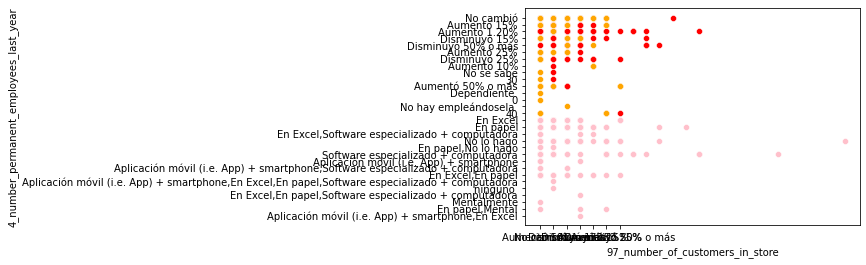

In [66]:
#con la matriz limpia, se grafica con 3 variables
from turtle import color
sns.scatterplot(x='97_number_of_customers_in_store', y='4_number_permanent_employees_last_year', color="red" , data=df)
sns.scatterplot(x='5_change_store_space_last_year', y='6_change_employees_average_salary_last_year', color="orange" , data=df)
sns.scatterplot(x='268_number_fridges', y='49_inventory_records', color="pink" , data=df)

In [67]:
#declaramos las v ariables dependientes 
varind=df[['49_inventory_records', '103_number_own_fridges', '2_current_permanent_employees']]
vardep=df['97_number_of_customers_in_store']

In [68]:
from sklearn.linear_model import LinearRegression
modelo=LinearRegression()

In [69]:
#verificamos la funcion relacionada al modelo
type(modelo)

sklearn.linear_model._base.LinearRegression

In [73]:
modelo.fit(X=varind, y=vardep)

ValueError: ignored

In [74]:
#verificamos los coeficientes obtenidos para el modelo ajustado
modelo.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['49_inventory_records', '103_number_own_fridges',
        '2_current_permanent_employees'], dtype=object)}

In [75]:
#evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 
#si es eficiente pues esta muy cerca del 1 
modelo.score(varind,vardep)

ValueError: ignored

In [76]:
y_prend=modelo.predict(X=df[['49_inventory_records', '103_number_own_fridges', '2_current_permanent_employees']])
y_prend

ValueError: ignored